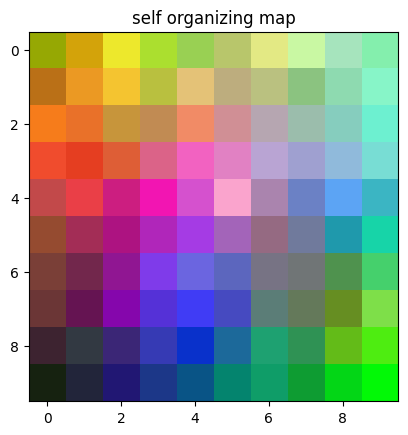

In [1]:
#LAB-6A-SELF ORGANIZING MAP
import numpy as np
import matplotlib.pyplot as plt

grid_size,lr,epochs=(10,10),0.1,1000
radius=max(grid_size)/2
weights=np.random.rand(*grid_size,3)
data=np.random.rand(100,3)

for _ in range(epochs):
    for samples in data:
        bmu=np.unravel_index(np.argmin(np.linalg.norm(weights-samples,axis=2)),grid_size)
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                if (dist:=np.linalg.norm(np.array([i,j])-bmu))<=radius:
                    weights[i,j]+=lr*np.exp(-dist**2/(2*radius**2))*(samples-weights[i,j])
    lr*=0.995
    radius*=0.995
plt.imshow(weights.reshape(*grid_size,-1))
plt.title('self organizing map')
plt.show()

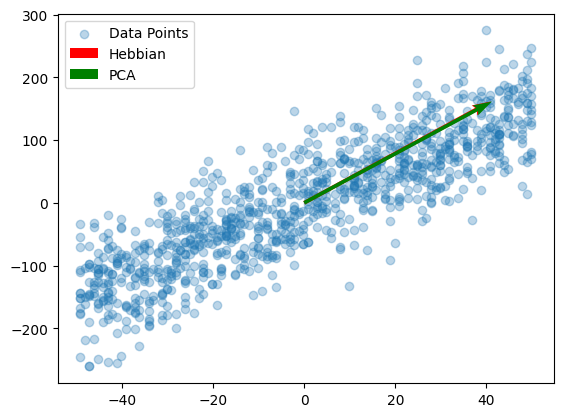

In [2]:
#LAB5-HEBBIAN PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

x=np.random.randint(0,100,1000)
noise=np.random.normal(2,50,size=x.shape)
y=3*x+2+noise
inputs=np.column_stack((x,y))
centered=inputs-np.mean(inputs,axis=0)
weights=np.random.rand(2)
lr=0.00001

for _ in range(100):
    for p in centered:
        weights+=lr*np.dot(weights,p)*p
    weights/=np.linalg.norm(weights)

w=weights*500
pca=PCA(n_components=1)
pca.fit_transform(centered)
origin=np.array([0,0])

plt.scatter(centered[:,0],centered[:,1],alpha=0.3,label='Data Points')
plt.quiver(*origin,*w,color='r',scale=3,scale_units='xy',angles='xy',label='Hebbian')
plt.quiver(*origin,*pca.components_[0]*500,color='g',scale=3,scale_units='xy',angles='xy',label='PCA')
plt.legend()
plt.show()

inputs	first func	second func
[0 0] 	 0.13533528323661262 	 1.0
[0 1] 	 0.36787944117144233 	 0.36787944117144233
[1 0] 	 0.36787944117144233 	 0.36787944117144233
[1 1] 	 1.0 	 0.13533528323661262


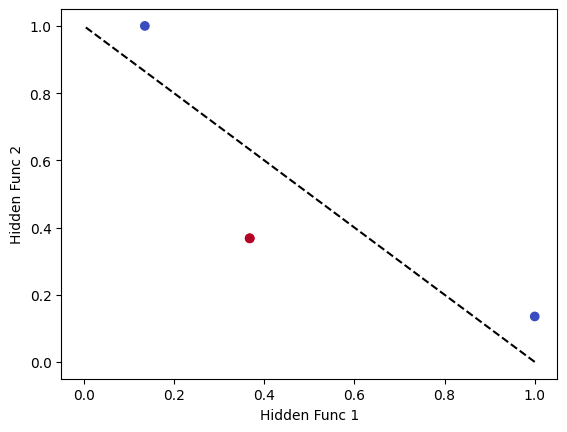

In [3]:
import numpy as np
import matplotlib.pyplot as plt

inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
outputs=np.array([0,1,1,0])
w1,w2=np.array([1,1]),np.array([0,0])

f1=np.exp(-np.linalg.norm(inputs-w1,axis=1)**2)
f2=np.exp(-np.linalg.norm(inputs-w2,axis=1)**2)

print('inputs\tfirst func\tsecond func')
for i,v1,v2 in zip(inputs,f1,f2):
    print(i,'\t',v1,'\t',v2)

plt.scatter(f1,f2,c=outputs,cmap='coolwarm')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('Hidden Func 1')
plt.ylabel('Hidden Func 2')
plt.show()

In [43]:
#LAB3B-XOR USING MLP,ERROR PROP BY ITERATING LR
import numpy as np

inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
outputs=np.array([[0],[1],[1],[0]])

for lr in[0.01,0.1,0.5]:
    np.random.seed(0)
    w1=np.random.randn(2,2)
    w2=np.random.randn(2,1)
    b1=np.zeros(2)
    b2=np.zeros(1)

    for epoch in range(10000):
        z1=np.dot(inputs,w1)+b1
        a1=1/(1+np.exp(-z1))
        z2=np.dot(a1,w2)+b2
        a2=1/(1+np.exp(-z2))
        error=np.mean((outputs-a2)**2)
        if error<0.01:
            break

        d2=(a2-outputs)*a2*(1-a2)
        d1=np.dot(d2,w2.T)*a1*(1-a1)

        w2-=lr*np.dot(a1.T,d2)
        b2-=lr*np.sum(d2)
        w1-=lr*np.dot(inputs.T,d1)
        b1-=lr*np.sum(d1)
    print('\nlearning rate:',lr)
    print('stopped at epoch',epoch,'with error',error)

    print('\nXOR Gate Results')
    for i,o in zip(inputs,a2):
        print(f'input:{i}  predicted output:{o[0]:.2f}')


learning rate: 0.01
stopped at epoch 9999 with error 0.18168395490575923

XOR Gate Results
input:[0 0]  predicted output:0.30
input:[0 1]  predicted output:0.49
input:[1 0]  predicted output:0.71
input:[1 1]  predicted output:0.54

learning rate: 0.1
stopped at epoch 4988 with error 0.009996955914528581

XOR Gate Results
input:[0 0]  predicted output:0.09
input:[0 1]  predicted output:0.90
input:[1 0]  predicted output:0.90
input:[1 1]  predicted output:0.11

learning rate: 0.5
stopped at epoch 998 with error 0.009998815641407062

XOR Gate Results
input:[0 0]  predicted output:0.09
input:[0 1]  predicted output:0.90
input:[1 0]  predicted output:0.90
input:[1 1]  predicted output:0.11


In [53]:
import numpy as np

np.random.seed(0)
X=np.array([[0.1,0.2],[0.3,0.4]])
Y=np.array([[0.5],[0.6]])
W=np.random.randn(2,2)
V=np.random.randn(2,1)
h=np.zeros(2)
lr=0.01

for epoch in range(50):
    loss=0
    for t in range(len(X)):
        h=np.tanh(np.dot(X[t],W)+h)
        y_pred=np.dot(h,V)
        error=Y[t]-y_pred
        loss+=np.mean(error**2)

        dV=h[:,None]*error
        dH=error*V.T*(1-h**2)
        dW=X[t][:,None]*dH

        V+=lr*dV
        W+=lr*dW
    if epoch%10==0:
        print('epoch:',epoch,'\tLoss:',loss)
    

epoch: 0 	Loss: 0.09188651290714453
epoch: 10 	Loss: 0.06031796411834037
epoch: 20 	Loss: 0.030708764382198127
epoch: 30 	Loss: 0.015757486027019058
epoch: 40 	Loss: 0.00820531443163685
